# Исследование данных о размере мидий

In [61]:
# Подготовка данных
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105, 0] # добавим 0 в конец массива для создания DataFrame
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]

# Объединение в DataFrame
import pandas as pd
data = pd.DataFrame({'petersburg': petersburg, 'magadan': magadan})

data.info()

# Заполним пропущенное значение средним. Точно известно, что это последнее значение
data['petersburg'].iloc[7] = data['petersburg'].mean()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   petersburg  8 non-null      float64
 1   magadan     8 non-null      float64
dtypes: float64(2)
memory usage: 256.0 bytes


,petersburg,magadan
0,0.097400,0.1033
1,0.135200,0.0915
2,0.081700,0.0781
3,0.101600,0.0685
4,0.096800,0.0677
5,0.106400,0.0697
6,0.105000,0.0764
7,0.090512,0.0689


Для выбора вида теста на корреляцию необходимо оценить распределение данных.

Проведём тесты на нормальное распределение

In [70]:
# Определим гипотезы и уровень значимости
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

alpha = 0.05

# Тест
from scipy.stats import shapiro

w, p = shapiro(data)
#print('p=%.3f' % p)
display((w, p))

# Интерпретация
if p > alpha:
	print(H0)
else:
	print(Ha)

(0.9143115878105164, 0.1365790218114853)

Данные распределены нормально


Значение статистики w очень близко к единице, это говорит о том, что распределение близко к нормальному.

p-value 0.137 превышает заданный уровень статистической значимости 0.05. 

Это означает, что отличие распределения нашей выборки от нормального не является статистически значимым. И мы не можем отвергнуть нулевую гипотезу.

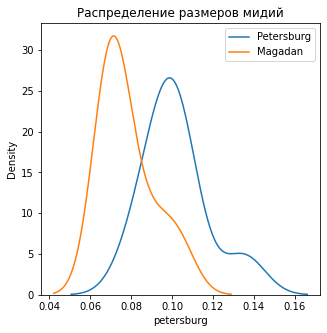

In [63]:
# Визуализируем данные, чтобы убедиться в нормальности распределения другим путём
import seaborn as sns
import matplotlib.pyplot as plt

# Зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(5, 5))

sns.kdeplot(data['petersburg'], ax=ax1, label='Petersburg')
sns.kdeplot(data['magadan'], ax=ax1, label='Magadan')

ax1.set_title('Распределение размеров мидий')
plt.legend()

# Тест на корреляцию

Размеры мидий представлены числами, в теории могут иметь любую точность и принимать любое значение (в определённом интервале).

Это данные непрерывного типа, с распределением, которое можно считать нормальным.

Поэтому будем использовать тест на корреляцию Пирсона для данных такого типа.

In [72]:
# Тест
from scipy.stats import pearsonr

corr, p = pearsonr(data['petersburg'], data['magadan'])
display((corr, p))

# Интерпретация
if p>alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между двумя наборами данных.")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между наборами данных.")

(0.31683207365572313, 0.4444981530678641)

0.4444981530678641 > 0.05. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между двумя наборами данных.


Тест на корреляцию показал следующее:

Коэффициент корреляции Пирсона: corr = 0.31, что показывает слабый уровень зависимости

Вероятность ошибки при отклонении нулевой гипотезы равна p = 0.44 (44%), и это превышает заданный уровень статистической значимости 5%, поэтому мы не можем отклонить нулевую гипотезу. 

# Сравнительный тест

Мы сравниваем:

две группы количественных данных, обе выборки размером меньше 30, при этом данные происходят из разных совокупностей

по одному и тому же параметру - среднему размеру.

Используем независимый T-тест.

In [73]:
# Определим гипотезы и уровень значимости
H0 = 'Нет значимой разницы между средними размерами мидий, произведённых в двух разных городах.'
Ha = 'Есть значимая разница между средними размерами мидий, произведённых в двух разных городах.'

aplpha = 0.05

# Тест
from scipy.stats import ttest_ind

st_t, p = ttest_ind(data['petersburg'], data['magadan'], equal_var=True)
display((st_t, p))

# Интерпретация
p = round(p,2)

if p>alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

(3.3116860802596855, 0.005141338233664433)

0.01 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между средними размерами мидий, произведённых в двух разных городах.


T-тест показал следующее:

Если мы отклоним нулевую гипотезу, вероятность ошибки составит 0.005. Данный результат не является статистически значимым (он меньше заданного уровня 5%).

Поэтому мы отклоняем нулевую гипотезу.

Сравнение средних значений двух выборок: так как мы предполагаем, что наши выборки из небольшого количества значений - это генеральные совокупности выборок большего размера, мы не можем рассчитать средние значения просто по нашим выборкам. Необходимо использовать полученную в результате теста t-статистику 3.31. Для понимания существенности различий нужно сравнить её с табличным значением для нашего количества степеней свободы f = 8 + 8 - 2 = 14. Табличное значение для f = 14 и alpha =0.05 (уровень значимости) равно 2.145, полученное нами значение превышает его, что говорит о статистически значимых различиях.